In [1]:
#ライブラリのインポート
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import collections
import re
import os

In [2]:
# データのダウンロード
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
path_label = [["business",0],["entertainment",1],["food",2],["graphics",3],["historical",4],["medical",5],["politics",6],["space",7],["sport",8],["technologie",9]]

In [64]:
# データの読み込み
text_list = []
label_list = []

def dir_check(path,label):
    files = os.listdir('archive/'+path)
    for file in files:
        file_check('archive/'+path+'/'+file,label)
        
def file_check(path,label):
    f = open(path, 'r', encoding='UTF-8')
    
    text = f.read()
    text_list.append(text)
    label_list.append(label)
    
    f.close()

for pl in path_label:
    dir_check(pl[0],pl[1])

In [65]:
# トークン化
from nltk.tokenize import word_tokenize

token_list = []

for text in text_list:
    tokens = word_tokenize(text)
    token_list.append(tokens)

In [66]:
# ストップワードの読み込み
from nltk.corpus import stopwords

en_stop = stopwords.words('english')
print(en_stop[0:10])
print(len(en_stop))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
179


In [67]:
en_stop= ["``","/",",.",".,",";","--",":",")","(",'"','&',"'",'),',',"','-','.,','.,"','.-',"?",">","<","$","%"]                  \
         +["say"] \
         +en_stop

In [68]:
# 前処理
from nltk.corpus import wordnet as wn #lemmatize関数のためのimport

def preprocess_word(word, stopwordset):
    
    #1.make words lower ex: Python =>python
    word=word.lower()
    
    #2.remove "," and "."
    if word in [",","."]:
        return None
    
    #3.remove stopword  ex: the => (None) 
    if word in stopwordset:
        return None
    
    pattern1 = '.*\d'
    res = re.match(pattern1, word)
    if res:
        return None
    
    pattern2 = '.*\''
    res = re.match(pattern2, word)
    if res:
        return None
    
    #4.lemmatize  ex: cooked=>cook
    lemma = wn.morphy(word)
    if lemma is None:
        return word

    elif lemma in stopwordset: #lemmatizeしたものがstopwordである可能性がある
        return None
    else:
        return lemma

def preprocess_document(document):
    document=[preprocess_word(w, en_stop) for w in document]
    document=[w for w in document if w is not None]
    return document

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]

In [69]:
pre_docs=preprocess_documents(token_list)
pre_docs=[" ".join(doc) for doc in pre_docs]
print(pre_docs[0])

vectorizer = TfidfVectorizer(max_features=200, token_pattern=u'(?u)\\b\\w+\\b' )

lufthansa flies back profit german airline lufthansa return profit posting huge losses preliminary report airline announce net profits euro compare loss euro operate profits euro ten times lufthansa hit tough competition dip demand following iraq war killer sars virus also hit trouble us catering business last year lufthansa show sign recovery even european us airline teeter brink bankruptcy board lufthansa recommend pay dividend euro per share shareholder get dividend company give details result march


In [70]:
tf_idf = vectorizer.fit_transform(pre_docs)

In [71]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state = 0)

In [72]:
clusters = km.fit_predict(tf_idf)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
for doc, cls in zip(pre_docs, clusters):
    print(cls,doc)

0 lufthansa flies back profit german airline lufthansa return profit posting huge losses preliminary report airline announce net profits euro compare loss euro operate profits euro ten times lufthansa hit tough competition dip demand following iraq war killer sars virus also hit trouble us catering business last year lufthansa show sign recovery even european us airline teeter brink bankruptcy board lufthansa recommend pay dividend euro per share shareholder get dividend company give details result march
0 winn-dixie file bankruptcy us supermarket group winn-dixie file bankruptcy protection succumb stiff competition market dominate wal-mart winn-dixie among profitable us grocer chapter protection would enable successfully restructure store would remain open analyst would likely off-load number site jacksonville florida-based firm total debt bankruptcy petition list big creditor us food giant kraft food owe analyst winn-dixie keep consumer demand also burden number store need upgrade re

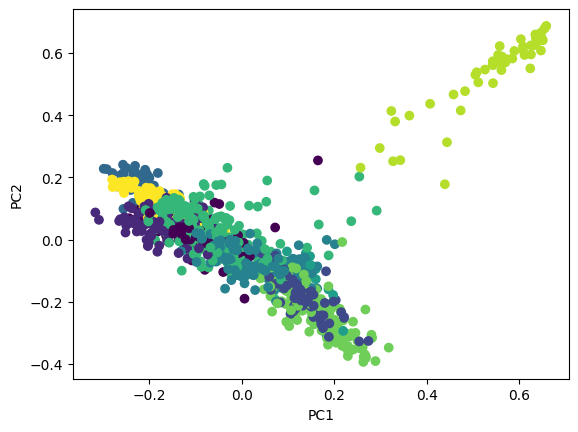

In [74]:
pca = PCA(n_components=2)  # 2次元に変換
reduced_features = pca.fit_transform(tf_idf.toarray())
    
# 可視化
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


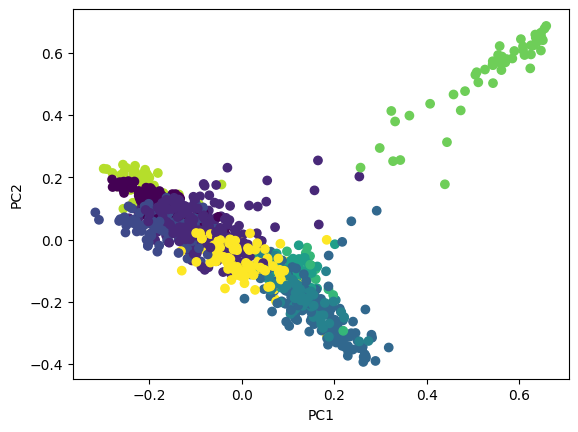

In [80]:
# クラスタリングと主成分分析の関数
def cluster_and_visualize(texts):
    # テキストデータのベクトル化
    vectorizer = TfidfVectorizer(max_features=200, token_pattern=u'(?u)\\b\\w+\\b' )#TfidfVectorizer()
    X = vectorizer.fit_transform(texts)
    
    # クラスタリングの実行
    kmeans = KMeans(n_clusters=10)  # クラスタ数を指定
    clusters = kmeans.fit_predict(X)
    
    # 主成分分析の実行
    pca = PCA(n_components=2)  # 2次元に変換
    reduced_features = pca.fit_transform(X.toarray())
    
    # 可視化
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# サンプルの文章データ
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# クラスタリングと可視化の実行
cluster_and_visualize(pre_docs)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


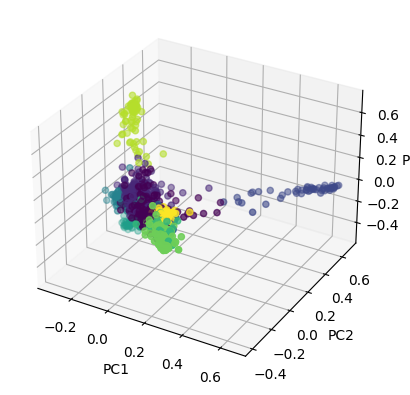

In [82]:
# 3次元で可視化
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# クラスタリングと主成分分析の関数
def cluster_and_visualize(texts):
    # テキストデータのベクトル化
    vectorizer = TfidfVectorizer(max_features=200, token_pattern=u'(?u)\\b\\w+\\b' )
    X = vectorizer.fit_transform(texts)
    
    # クラスタリングの実行
    kmeans = KMeans(n_clusters=10)  # クラスタ数を指定
    clusters = kmeans.fit_predict(X)
    
    # 主成分分析の実行
    pca = PCA(n_components=3)  # 3次元に変換
    reduced_features = pca.fit_transform(X.toarray())
    
    # 可視化
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=clusters)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

# サンプルの文章データ
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# クラスタリングと可視化の実行
cluster_and_visualize(pre_docs)


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


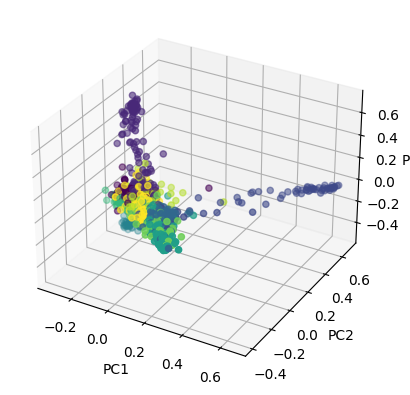

In [78]:
# 正解データを可視化
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# クラスタリングと主成分分析の関数
def cluster_and_visualize(texts):
    # テキストデータのベクトル化
    vectorizer = TfidfVectorizer(max_features=200, token_pattern=u'(?u)\\b\\w+\\b' )
    X = vectorizer.fit_transform(texts)
    
    # クラスタリングの実行
    kmeans = KMeans(n_clusters=10)  # クラスタ数を指定
    clusters = kmeans.fit_predict(X)
    
    # 主成分分析の実行
    pca = PCA(n_components=3)  # 3次元に変換
    reduced_features = pca.fit_transform(X.toarray())
    
    # 可視化
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=label_list)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

# サンプルの文章データ
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# クラスタリングと可視化の実行
cluster_and_visualize(pre_docs)
